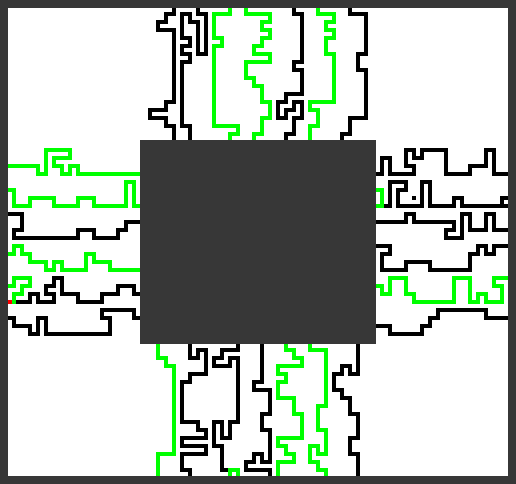

part1: 602 602


In [1]:
from PIL import Image
from IPython import display
import numpy as np
import cv2
import math
import time




def ld():
    #map
    m={}
    
    for y,l in enumerate(open("20.txt").read().split('\n')):
        #if y in range(40,50):
        #    print(l[:20])
        for x,v in enumerate(l):
            p=(x,y)
            #print(v)
            if v=='.' or v=='#' or v.isalpha():
                
                m[p]=v
                #print(v)
                
    ww=max([x[0] for x in m.keys()])+1
    hh=max([x[1] for x in m.keys()])+1
    """
    NN=10
    for y in range(NN*14):
        for x in range(NN):
            p=(x,y)
            v=' '
            if p in m:
                v=m[p]
            print(v,end='')
            
        print()
    """

    #prune dead ends
    while 1:
        done=1
        for x,y in m.keys():
            if m[(x,y)]=='.':
                nnn=0
                for dx,dy in [(1,0),(0,1),(-1,0),(0,-1)]:
                    ppp=(x+dx,y+dy)
                    if ppp in m and m[ppp] != '#':
                        nnn+=1
                if nnn==1:        
                    m[(x,y)]='#'
                    #print("killing",x,y)
                    done=0
                    break
                
            
        if done:
            break
    
    
    #print(w,h)
    
    #connections
    j={} 
    #warps
    w={}
    #blockers
    b={}
    for k1 in m.keys():
        x,y=k1
        if m[k1]=='.':
            if not k1 in j:
                j[k1]=[]
        if m[k1]=='#':
            b[k1]='#'
        for dx,dy in [(1,0),(0,1),(-1,0),(0,-1)]:
            k2=(x+dx*1,y+dy*1)
            k3=(x+dx*2,y+dy*2)
            if k2 in m:
                if m[k1]=='.' and m[k2]=='.':
                    j[k1].append(k2)
                else:
                    #print("b",m[k2])
                    if k3 in m and m[k3]!='.':
                        kk=0
                        if (dx,dy) in [(1,0),(0,1)]:
                            #print("Aaa")
                            kk=[m[k2],m[k3]]
                        else:
                            #print("Bbb")
                            kk=[m[k3],m[k2]]
                        
                                
                        if not '#' in kk:
                            
                            kk="".join(kk)
                            if not kk in w:
                                w[kk]=[]
                            w[kk].append(k1)
        
    for k in w.keys():
        
        
        if len(w[k])==2:
            A,B=w[k]
            j[A].append(B)
            j[B].append(A)
        #if 'E' in k:
        #    print(k,len(w[k]))
    
    
    A=(0,0)
    A=w['AA'][0]
    B=(1,1)
    B=w['ZZ'][0]
    return j,b,ww,hh,A,B


def pretty(j,b,w,h,A,B,p,ppp=None):
    #print("pretty")
    #print(j)
    #print(b)
    #print(w,h)
    #print(A,B)
    #print(p)
    
    i=np.ones([h,w,3],dtype=np.uint8)*55
    for x,y in j.keys():
        i[y,x,:]=[0,0,0]
    for x,y in b.keys():
        i[y,x,:]=255
    
    i[p[1],p[0],:]=[255,0,255]
    
    if ppp:
        for x,y in ppp:
            i[y,x,:]=[0,255,0]
            
    
    
    #print(w,h)
    #print(a,b)
    i[A[1],A[0],:]=[0,255,0]
    i[B[1],B[0],:]=[255,0,0]
    
    F=4
    i = cv2.resize(i, fx=F, fy=F, dsize=(0, 0), interpolation=cv2.INTER_NEAREST)
    display.clear_output(wait=True)
    display.display(Image.fromarray(i))

#msut not be too optimistic
def H(j, p, t):
    #return 0
    dx = p[0]-t[0]
    dy = p[1]-t[1]
    return math.sqrt(dx*dx+dy*dy)
    #*10000

def p1():
    #jumpmap, blockmap, width, height, start, target 
    j,b,w,h,A,B=ld()

    #return 1
    e=[([],A,0,H(j, A, B))]
    past={}
    
    npt=time.time()
    steps = 1
    while len(e):
        ppp,p,c,hh=e[0]
        e=e[1:]
        
        t=time.time()
        #if t>npt:
        if steps%1000==0:
            npt=t+1
            pretty(j,b,w,h,A,B,p,ppp)
        
        if p==B:
            pretty(j,b,w,h,A,B,p,ppp)
            return c
        
        past[p]=1        
        for p2 in j[p]:
            if not p2 in past:
                e.append((ppp+[p],p2,c+1, H(j,p2, B)))
        
        e=sorted(e,key=lambda x: sum(x[-2:]))
        #print(e[:5])
        steps += 1
    
print("part1:",p1(),602)
     
  

In [2]:
#895 too high
#883 too high - sub 